## Chapter 11 Exercises: Training Deep Neural Networks


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

2024-08-20 21:18:23.349794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 21:18:23.349931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 21:18:23.495807: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 8- Practice training a deep neural network on the CIFAR10 image dataset:


In [2]:
from tensorflow.keras.datasets import cifar10

cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#### a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the Swish activation function.


In [3]:
tf.keras.backend.clear_session()

In [4]:
from tensorflow.keras.layers import Dense, Input,Flatten
from tensorflow.keras.activations import swish
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.models import Sequential
from pathlib import Path

In [5]:
model = Sequential([
    Input(X_train_full.shape[1:]),
    Flatten()
])
for _ in range(20):
    model.add(Dense(100, activation="swish",
                    kernel_initializer="he_normal"))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

#### b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with tf.keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.


In [7]:
tf.random.set_seed(42)

i = 0

In [8]:
import os
import shutil
# Define the directory path
models_dir = "models"

# Create the 'models' directory if it doesn't exist
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Directory '{models_dir}' created successfully.")
else:
    shutil.rmtree(models_dir)
    os.makedirs(models_dir)
    print(f"Directory '{models_dir}' cleared and created again successfully.")


Directory 'models' created successfully.


In [9]:
lr = 5e-5
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20, verbose=1, restore_best_weights=True)
model_check_points = tf.keras.callbacks.ModelCheckpoint(
    filepath='models/basic_model.keras', save_best_only=True, verbose=1)

run_index = i
i += 1
run_logdir = Path('models') / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

callbacks = [early_stopping, model_check_points, tensorboard_cb]

loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [10]:
%load_ext tensorboard
%tensorboard --logdir=models/my_cifar10_logs

In [11]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir models/my_cifar10_logs (started 0:00:00 ago; pid 110)


In [12]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/100
   1/1407 ━━━━━━━━━━━━━━━━━━━━ 3:45:49 10s/step - accuracy: 0.0938 - loss: 161.3217

I0000 00:00:1724188776.269160     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724188776.293661     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1351 - loss: 11.0995

W0000 00:00:1724188784.977760     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 2.18527, saving model to models/basic_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1351 - loss: 11.0947 - val_accuracy: 0.2250 - val_loss: 2.1853
Epoch 2/100
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2221 - loss: 2.1121
Epoch 2: val_loss improved from 2.18527 to 2.02799, saving model to models/basic_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2221 - loss: 2.1120 - val_accuracy: 0.2578 - val_loss: 2.0280
Epoch 3/100
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2645 - loss: 1.9921
Epoch 3: val_loss improved from 2.02799 to 1.95821, saving model to models/basic_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2646 - loss: 1.9921 - val_accuracy: 0.2792 - val_loss: 1.9582
Epoch 4/100
1403/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3010 - loss: 1.9157
Epoch 4: val_loss improved from 1.95821 to 1.88520, saving model to models/basic_model.keras
1407/

In [13]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4340 - loss: 1.5882


[1.5843029022216797, 0.4296000003814697]

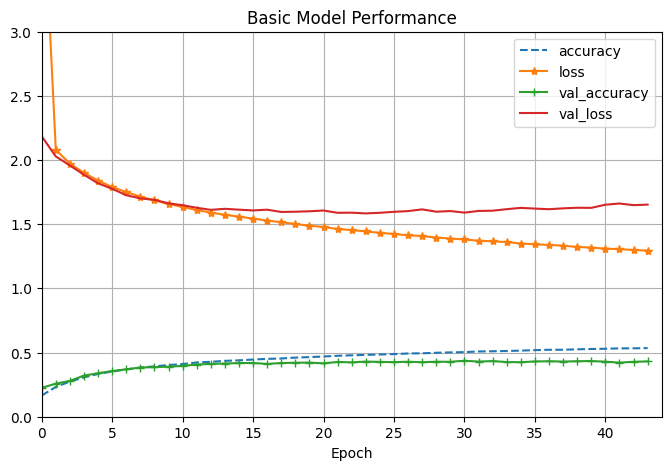

In [14]:
epochs_completed = len(history.epoch)

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, epochs_completed], ylim=[0, 3], grid=True, xlabel="Epoch",
    style=['--', '*-', '+-','-'])
plt.legend(loc="upper right") 
plt.title('Basic Model Performance')
plt.show()

---

#### c. Now try adding batch normalization and compare the learning curves: is it converging faster than before? Does it produce a better model? How does it affect training speed?


In [15]:
tf.keras.backend.clear_session()

In [19]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("models/my_cifar10_bn_model.keras",
                                                         save_best_only=True, verbose=1)
run_index = 1 
run_logdir = Path('models') / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

history_bn = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


W0000 00:00:1724189071.690634     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1900 - loss: 2.1980

W0000 00:00:1724189085.998561     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.1900 - loss: 2.1979 - val_accuracy: 0.2738 - val_loss: 2.0419
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3411 - loss: 1.8132 - val_accuracy: 0.3732 - val_loss: 1.7507
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3929 - loss: 1.6868 - val_accuracy: 0.3872 - val_loss: 1.6864
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4297 - loss: 1.5972 - val_accuracy: 0.4142 - val_loss: 1.6284
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4609 - loss: 1.5183 - val_accuracy: 0.3976 - val_loss: 1.7115
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4833 - loss: 1.4493 - val_accuracy: 0.4144 - val_loss: 1.7071
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5091 - loss: 1.3839 - val_accuracy: 0.3950 - val_loss: 1.7376
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5360 - loss: 1.3191 - va

[1.6284401416778564, 0.4142000079154968]

-  <font size=4>The Speed of training is a bit slower than regular model, in basic model it takes **6** seconds to complete an epoch while taking **8** seconds with adding batch normalization</font>

- <font size=4>it Converges faster in only 7 iterations, but not better than our basic model</font>

- <font size=4> It seems it has a serious issues in the model as it suffer from low performance and overfitting</font>

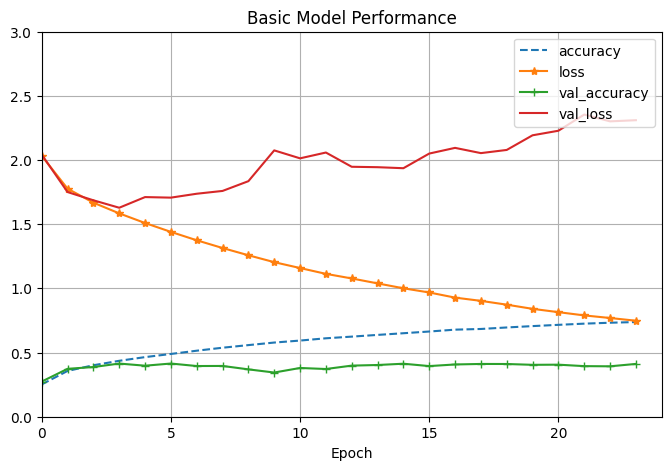

In [23]:
epochs_completed = len(history_bn.epoch)

pd.DataFrame(history_bn.history).plot(
    figsize=(8, 5), xlim=[0, epochs_completed], ylim=[0, 3], grid=True, xlabel="Epoch",
    style=['--', '*-', '+-','-'])
plt.legend(loc="upper right") 
plt.title('Basic Model Performance')
plt.show()

#### d. Try replacing batch normalization with SELU, and make the necessary adjust ments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).


In [34]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds


model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="lecun_normal"))
    model.add(tf.keras.layers.Activation("selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True, verbose=1)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("models/my_cifar10_selu_model.keras",
                                                         save_best_only=True, verbose=1)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

history_selu = model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)



Epoch 1/100
  12/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1086 - loss: 2.8893        

W0000 00:00:1724190362.391875     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2586 - loss: 2.0669

W0000 00:00:1724190370.666857     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.80449, saving model to models/my_cifar10_selu_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.2587 - loss: 2.0668 - val_accuracy: 0.3554 - val_loss: 1.8045
Epoch 2/100
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3744 - loss: 1.7516
Epoch 2: val_loss improved from 1.80449 to 1.67428, saving model to models/my_cifar10_selu_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3744 - loss: 1.7516 - val_accuracy: 0.4168 - val_loss: 1.6743
Epoch 3/100
1395/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4215 - loss: 1.6361
Epoch 3: val_loss improved from 1.67428 to 1.59873, saving model to models/my_cifar10_selu_model.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4215 - loss: 1.6360 - val_accuracy: 0.4446 - val_loss: 1.5987
Epoch 4/100
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4487 - loss: 1.5659
Epoch 4: val_loss improved from 1.59873 to 1.58177, saving model to m

In [35]:
model.evaluate(X_valid_scaled, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 1.5263


[1.5101388692855835, 0.4959999918937683]

- <font size=4> The Model using self-normalizing proparety is pretty good, and beats last two models, it reaches slightly better result in less time than other 2 models..</font>

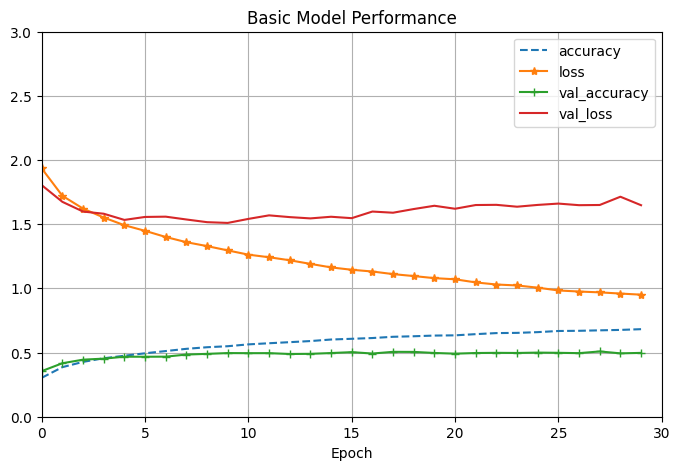

In [36]:
epochs_completed = len(history_selu.epoch)

pd.DataFrame(history_selu.history).plot(
    figsize=(8, 5), xlim=[0, epochs_completed], ylim=[0, 3], grid=True, xlabel="Epoch",
    style=['--', '*-', '+-','-'])
plt.legend(loc="upper right") 
plt.title('Basic Model Performance')
plt.show()

#### e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

Alpha dropout is debrciated from tensorflow, and open implementations diverge the model..